## Load lib

In [1]:
import numpy as np
import pyramses

## Load Models

In [2]:
from models import end_simulation
from models import move_file
from models import sfc
from models import Gens
from models import sortGens

## Load a simulator instance

In [3]:
ram = pyramses.sim()

## Load saved test-case & Add more observation(s)

In [4]:
case = pyramses.cfg('cmd.txt')  
case.addRunObs('MS g2')  # will plot a frequency-time diagram by bus g2
monitor = ['g2']

## Universe Parameters (relative fixed)

In [5]:
liST = []
list_of_gens = []
weight_of_gens = []
list_of_td = []
prepared_folder_address = 'cur'
start_time = 150.0
end_time = 600.0  # (dst file)
agcTimeStep = 1.0

## Breaker (one of distrubances) & Selected generators (to help fix errors)

In [6]:
breaker = 'g8'  # (dst file)
          
g6 = Gens('g6', 1/8, 0.01)
g7 = Gens('g7', 1/16, 0.02)
g14 = Gens('g14', 7/32, 0.03)
g15 = Gens('g15', 3/8, 0.04)
g16 = Gens('g16', 7/32, 0.05)  
liST.append(g6)
liST.append(g7)
liST.append(g14)
liST.append(g15)
liST.append(g16)

sortGens(liST, list_of_gens, weight_of_gens, list_of_td)


#list_of_gens = ['g6', 'g7', 'g14', 'g15', 'g16']
#weight_of_gens = [1/8,1/16,7/32,3/8,7/32]  # (ref. dny_A.dat)
#list_of_td = [0.01, 0.02, 0.03, 0.04, 0.05]

['g6', 'g7', 'g14', 'g15', 'g16']
[0.125, 0.0625, 0.21875, 0.375, 0.21875]
[0.01, 0.02, 0.03, 0.04, 0.05]


## Test with fixed kp and ki

In [7]:
if __name__ == '__main__':
    kp = 1.1
    ki = 0.1
    
    kp = "{0:.2f}".format(round(float(kp),2))
    ki = "{0:.2f}".format(round(float(ki),2))
    print("kp = " + str(kp))
    print("ki = " + str(ki))
    
    sfc(ram, case, monitor, list_of_gens, weight_of_gens, list_of_td, prepared_folder_address, start_time, end_time, agcTimeStep, breaker, kp, ki)

kp = 1.10
ki = 0.10
kill gnuplot successfully
endSim() successfully
delete ram & case successfully
re-write cur successfully
copy cur successfully
delete temp_display(_).cur successfully
delete some trace files successfully



## Embed the frequency/voltage response in the output
**https://pyramses.paristidou.info/_modules/pyramses/extractor.html#extractor.getSync**

In [8]:
ext = pyramses.extractor(case.getTrj())

### Check frequency in the grid via monitor

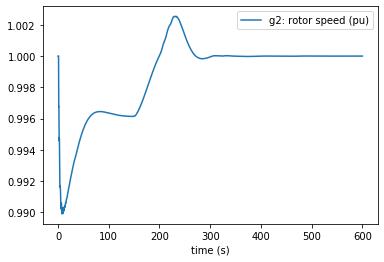

In [9]:
ext.getSync('g2').S.plot()

### Power of g6 (Snom = 400 MW)

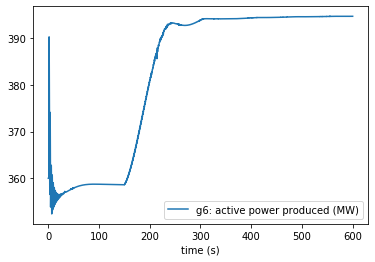

In [10]:
ext.getSync('g6').P.plot()

In [11]:
# ext.getSync('g6').P